In [1]:
import numpy as np
import pandas as pd
from numpy import loadtxt
import re

In [2]:
# import data
data = pd.DataFrame(pd.read_csv('/home/justin/Documents/PHYS247/LendingClub.csv'))
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Fully Paid,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Fully Paid,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Fully Paid,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Charged Off,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000,395219.000000
mean,14122.061250,13.642094,432.069020,7.419937e+04,17.390758,11.318494,0.178481,1.585165e+04,53.808764,25.426505,1.787387,0.121722
std,8357.054944,4.472944,250.700153,6.155725e+04,18.032696,5.134901,0.531098,2.058427e+04,24.440088,11.885322,2.063743,0.356273
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.300000,8.000000,0.000000,6.038000e+03,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.490000,6.400000e+04,16.920000,10.000000,0.000000,1.119000e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.550000,567.790000,9.000000e+04,22.990000,14.000000,0.000000,1.962600e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [4]:
data.info()
# no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

In [5]:
data.describe(include=['O'])

,term,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
count,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219
unique,2,7,35,6,3,2,14,684,2,3,392898
top,36 months,B,B3,MORTGAGE,Verified,Fully Paid,debt_consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\nFPO AE 70466
freq,301247,115812,26611,198022,139451,317696,234169,3013,237346,394508,8


In [6]:
# loan_status will be y
data['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

## a) Data cleaning

In [7]:
# Convert all categorical variables to numeric variables.
# convert categorical columns to type "category", then use cat.codes to convert to numeric codes
changeToNumeric=['term','grade','sub_grade','home_ownership','verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'earliest_cr_line']
for c in changeToNumeric:
    data[c]=data[c].astype('category')
    data[c]=data[c].cat.codes

data.dtypes

loan_amnt               float64
term                       int8
int_rate                float64
installment             float64
grade                      int8
sub_grade                  int8
home_ownership             int8
annual_inc              float64
verification_status        int8
loan_status                int8
purpose                    int8
dti                     float64
earliest_cr_line          int16
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status        int8
application_type           int8
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [8]:
# Extract the zip-code information from the borrowers’ address and consider that as one of your features.

data['zip'] = data['address'].str.extract(r'(\d{5}\-?\d{0,4})')
data = data.drop(['address'], axis=1)
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip
0,10000.0,0,11.44,329.48,1,8,5,117000.0,0,1,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,22690
1,8000.0,0,11.99,265.68,1,9,1,65000.0,0,1,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,05113
2,15600.0,0,10.49,506.97,1,7,5,43057.0,1,1,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,87025
3,7200.0,0,6.49,220.65,0,1,5,54000.0,0,1,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,00813
4,24375.0,1,17.27,609.33,2,14,1,55000.0,2,0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,11650


In [9]:
# move loan_status to front in order to split X and y
first_col = data.pop('loan_status')
data.insert(0, 'loan_status', first_col)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_status           395219 non-null  int8   
 1   loan_amnt             395219 non-null  float64
 2   term                  395219 non-null  int8   
 3   int_rate              395219 non-null  float64
 4   installment           395219 non-null  float64
 5   grade                 395219 non-null  int8   
 6   sub_grade             395219 non-null  int8   
 7   home_ownership        395219 non-null  int8   
 8   annual_inc            395219 non-null  float64
 9   verification_status   395219 non-null  int8   
 10  purpose               395219 non-null  int8   
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  int16  
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

In [10]:
X=data[data.columns[1:]]
y=pd.DataFrame(data['loan_status'])
y.head()

,loan_status
0,1
1,1
2,1
3,1
4,0


## b) Split the data to training (70%) and test(30%) sample.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.3,random_state=100)

In [13]:
y_train.shape

(276653, 1)

## c) Normalize all features

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Use sklearn.preprocessing.MinMaxScaler function to normalize all the features
# for both training and test sample.
scaler = MinMaxScaler()

In [16]:
# fit the scaler to X_train, then transform X_train (fit_transform)
# the scaler is fitted to X_train, so just need to transform X_test
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## d) Build Sequential Keras Model

In [17]:
# Build a sequential model using neural-network library Keras. Use four Dense layers
# (including input and output layers) along with dropout regularization to reduce overfitting.
# You need to decide on the number of neurons in each layer.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses

/home/justin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/justin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/justin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/justin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [60]:
# dimension of input layer should be the same as the number of features

# output layer should have same dimension as predictor. For price of house, 1 output
model=Sequential()

# add input layer
# using relu activation function because mutually exclusive classification problem
model.add(Dense(22, activation='relu'))

# adding dropout to avoid overfitting
model.add(Dropout(0.2))

# two hidden layers
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

# output layer has 1 neuron because classification function on 1 feature
model.add(Dense(1,activation='sigmoid'))

# using crossentropy loss function because classification problem
# measuring accuracy because classification problem
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
# compute loss and accuracy for test sample
# batch size is the number of data sets to use for each epoch
#  lower batch size avoids overfitting
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=20)

Train on 276653 samples, validate on 118566 samples
Epoch 1/20
276653/276653 [==============================] - 88s 319us/sample - loss: 0.4427 - acc: 0.8100 - val_loss: 0.4287 - val_acc: 0.8173
Epoch 2/20
276653/276653 [==============================] - 86s 311us/sample - loss: 0.4302 - acc: 0.8159 - val_loss: 0.4163 - val_acc: 0.8191
Epoch 3/20
276653/276653 [==============================] - 80s 289us/sample - loss: 0.4128 - acc: 0.8176 - val_loss: 0.4000 - val_acc: 0.8223
Epoch 4/20
276653/276653 [==============================] - 86s 312us/sample - loss: 0.4063 - acc: 0.8207 - val_loss: 0.3941 - val_acc: 0.8285
Epoch 5/20
276653/276653 [==============================] - 57s 204us/sample - loss: 0.4011 - acc: 0.8255 - val_loss: 0.3912 - val_acc: 0.8306
Epoch 6/20
276653/276653 [==============================] - 57s 205us/sample - loss: 0.3959 - acc: 0.8291 - val_loss: 0.3869 - val_acc: 0.8354
Epoch 7/20
276653/276653 [==============================] - 57s 206us/sample - loss: 0.392

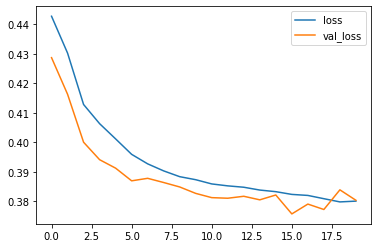

In [62]:
history=pd.DataFrame(model.history.history)
history[['loss','val_loss']].plot()

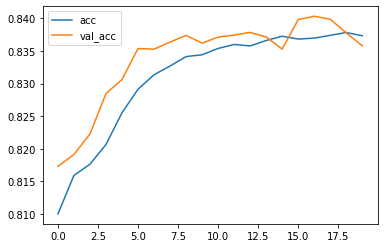

In [63]:
history[['acc','val_acc']].plot()

## e) Evaluate model performance

Find the confusion matrix and report accuracy, precision, recall, and F1-score

In [49]:
# comparing model predictions of X_test to y_test
prediction=np.around(model.predict(X_test))

In [50]:
T=y_test

In [51]:
# True Positive, True Negative, False Positive, False Negative counters
TP,TN,FP,FN=0,0,0,0

# for each element in y_test, count up TF, TN, FP, FN by comparing prediction and TRUTH (T)
for i in range(len(T)):
    if T[i]==1:
        if prediction[i]==1:
            TP+=1
        if prediction[i]==0:
            FN+=1
    if T[i]==0:
        if prediction[i]==1:
            FP+=1
        if prediction[i]==0:
            TN+=1

In [52]:
print(np.array([[TP,FP],[FN,TN]]))

[[92064 16552]
 [ 3203  6747]]


In [53]:
# How many positives are correct?
precision=TP/(TP+FP)
print("precision=",precision)

precision= 0.8476099285556455


In [54]:
recall=TP/(TP+FN)
# How many of the Positives did we find?
print("recall=",recall)

recall= 0.9663787040633168


In [55]:
F1_score=2*precision*recall/(precision+recall)
# combination of precision and recall to evaluate classification model
# 2 is for normalization
print("F1_score=",F1_score)

F1_score= 0.903106193257898


In [43]:
accuracy=(TP+TN)/(TP+FP+FN+TN)
# How many of our classifications are correct?
print("accuracy=",accuracy)

accuracy= 0.8035018470725166
